<a href="https://colab.research.google.com/github/obeabi/Assignments/blob/master/SkyHive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
!pip install wordcloud

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

In [39]:
df = pd.read_excel('Data Analyst Report Writer Sample Dataset.xlsx')
df.head()

,ObjectId,skill_title,DocumentId,Type,OriginalTitle,CreationDate,OriginalCompanyName,RangeFrom,RangeTo,ClusteredTitle,OriginalLocation,OriginalSalary,CountryCode,City,SalaryParsed,State,Complexity,importance
0,5bd23e5214b35001c88804db,computer software technical support,201163998,job,Lab Technician,2020-03-10 05:29:20,University of Toronto,48650.0,48650.0,laboratory technician,"Toronto, ON","$48,650 a year",CA,Toronto,b'\x01',ON,5.0,0.804382
1,5aca7f0d0cbf2c0460d62041,equipment servicing,201163998,job,Lab Technician,2020-03-10 05:29:20,University of Toronto,48650.0,48650.0,laboratory technician,"Toronto, ON","$48,650 a year",CA,Toronto,b'\x01',ON,6.0,0.841847
2,5add7a07dccd3b50f3bf5a69,laboratory equipment installation,201163998,job,Lab Technician,2020-03-10 05:29:20,University of Toronto,48650.0,48650.0,laboratory technician,"Toronto, ON","$48,650 a year",CA,Toronto,b'\x01',ON,5.0,1.023003
3,5acbe821c2c2f1713ae19ccf,laboratory maintenance,201163998,job,Lab Technician,2020-03-10 05:29:20,University of Toronto,48650.0,48650.0,laboratory technician,"Toronto, ON","$48,650 a year",CA,Toronto,b'\x01',ON,5.0,1.128249
4,5aa76e2653b12204854a64f0,mechanical equipment maintenance,201163998,job,Lab Technician,2020-03-10 05:29:20,University of Toronto,48650.0,48650.0,laboratory technician,"Toronto, ON","$48,650 a year",CA,Toronto,b'\x01',ON,6.0,0.946662


In [40]:
df.shape

(231713, 18)

In [41]:
column = df.columns
df.isnull().sum()

ObjectId                    0
skill_title                 0
DocumentId                  0
Type                        0
OriginalTitle            7050
CreationDate                0
OriginalCompanyName      7205
RangeFrom              216944
RangeTo                216944
ClusteredTitle              0
OriginalLocation            0
OriginalSalary          78694
CountryCode              5530
City                    11600
SalaryParsed                0
State                    9499
Complexity                 48
importance              45050
dtype: int64

In [42]:
# Examine data type
df.dtypes

ObjectId                       object
skill_title                    object
DocumentId                      int64
Type                           object
OriginalTitle                  object
CreationDate           datetime64[ns]
OriginalCompanyName            object
RangeFrom                     float64
RangeTo                       float64
ClusteredTitle                 object
OriginalLocation               object
OriginalSalary                 object
CountryCode                    object
City                           object
SalaryParsed                   object
State                          object
Complexity                    float64
importance                    float64
dtype: object

In [43]:
# print total number of missing values in original dataframe
print(df.isnull().sum().sum())

598564


In [44]:
# Let's examine OriginalLocation column
df['OriginalLocation'].value_counts()

MontrÃ©al, QC           15529
Toronto, ON             14215
Mississauga, ON          8951
Vancouver, BC            6915
Winnipeg, MB             6780
                        ...  
Parsippany, NJ              2
Newton, MA                  2
Balmain NSW                 2
Ottawa                      2
Dawson Creek, BC, CA        1
Name: OriginalLocation, Length: 1754, dtype: int64

In [45]:
# Let's create a new column with all capitalized entries from the original location column 
df['Location']= df['OriginalLocation'].str.upper()
df.head()

,ObjectId,skill_title,DocumentId,Type,OriginalTitle,CreationDate,OriginalCompanyName,RangeFrom,RangeTo,ClusteredTitle,OriginalLocation,OriginalSalary,CountryCode,City,SalaryParsed,State,Complexity,importance,Location
0,5bd23e5214b35001c88804db,computer software technical support,201163998,job,Lab Technician,2020-03-10 05:29:20,University of Toronto,48650.0,48650.0,laboratory technician,"Toronto, ON","$48,650 a year",CA,Toronto,b'\x01',ON,5.0,0.804382,"TORONTO, ON"
1,5aca7f0d0cbf2c0460d62041,equipment servicing,201163998,job,Lab Technician,2020-03-10 05:29:20,University of Toronto,48650.0,48650.0,laboratory technician,"Toronto, ON","$48,650 a year",CA,Toronto,b'\x01',ON,6.0,0.841847,"TORONTO, ON"
2,5add7a07dccd3b50f3bf5a69,laboratory equipment installation,201163998,job,Lab Technician,2020-03-10 05:29:20,University of Toronto,48650.0,48650.0,laboratory technician,"Toronto, ON","$48,650 a year",CA,Toronto,b'\x01',ON,5.0,1.023003,"TORONTO, ON"
3,5acbe821c2c2f1713ae19ccf,laboratory maintenance,201163998,job,Lab Technician,2020-03-10 05:29:20,University of Toronto,48650.0,48650.0,laboratory technician,"Toronto, ON","$48,650 a year",CA,Toronto,b'\x01',ON,5.0,1.128249,"TORONTO, ON"
4,5aa76e2653b12204854a64f0,mechanical equipment maintenance,201163998,job,Lab Technician,2020-03-10 05:29:20,University of Toronto,48650.0,48650.0,laboratory technician,"Toronto, ON","$48,650 a year",CA,Toronto,b'\x01',ON,6.0,0.946662,"TORONTO, ON"


In [46]:
# Let's recheck for missing values
df.isnull().sum()

ObjectId                    0
skill_title                 0
DocumentId                  0
Type                        0
OriginalTitle            7050
CreationDate                0
OriginalCompanyName      7205
RangeFrom              216944
RangeTo                216944
ClusteredTitle              0
OriginalLocation            0
OriginalSalary          78694
CountryCode              5530
City                    11600
SalaryParsed                0
State                    9499
Complexity                 48
importance              45050
Location                    0
dtype: int64

In [92]:
df2 = df[df['Location'].str.strip().str.contains('MI')]
df2 = df2.replace('\n','', regex=True)
#df2['Time'] = pd.to_datetime(df2['CreationDate'])
df2['Time'] = df['CreationDate'].dt.strftime('%m/%d/%Y')
df2['year'] = pd.DatetimeIndex(df2['CreationDate']).year
df2['month'] = pd.DatetimeIndex(df2['CreationDate']).month_name()


df2.head(5)

,ObjectId,skill_title,DocumentId,Type,OriginalTitle,CreationDate,OriginalCompanyName,RangeFrom,RangeTo,ClusteredTitle,OriginalLocation,OriginalSalary,CountryCode,City,SalaryParsed,State,Complexity,importance,Location,Time,year,month
25,5b2ad09eb3eb925e9b43d559,Business Development,188652593,resume,Consulting Analyst - Data Scientist - Programm...,2019-09-27,Info-Tech Research Group,NaN,NaN,programmer analyst,"Mississauga, ON",NaN,CA,Mississauga,b'\x01',ON,5.0,0.783319,"MISSISSAUGA, ON",09/27/2019,2019,September
26,5c352b092349e96712c0001f,community relations management,188652593,resume,Consulting Analyst - Data Scientist - Programm...,2019-09-27,Info-Tech Research Group,NaN,NaN,programmer analyst,"Mississauga, ON",NaN,CA,Mississauga,b'\x01',ON,5.0,0.792542,"MISSISSAUGA, ON",09/27/2019,2019,September
27,5c352a832349e96712bffbc7,data research,188652593,resume,Consulting Analyst - Data Scientist - Programm...,2019-09-27,Info-Tech Research Group,NaN,NaN,programmer analyst,"Mississauga, ON",NaN,CA,Mississauga,b'\x01',ON,5.0,0.778329,"MISSISSAUGA, ON",09/27/2019,2019,September
28,5b106cbd646efe58ac44b25d,Data Science,188652593,resume,Consulting Analyst - Data Scientist - Programm...,2019-09-27,Info-Tech Research Group,NaN,NaN,programmer analyst,"Mississauga, ON",NaN,CA,Mississauga,b'\x01',ON,6.0,0.897270,"MISSISSAUGA, ON",09/27/2019,2019,September
29,5b5f2aec3820c244477270d6,Data Visualization,188652593,resume,Consulting Analyst - Data Scientist - Programm...,2019-09-27,Info-Tech Research Group,NaN,NaN,programmer analyst,"Mississauga, ON",NaN,CA,Mississauga,b'\x01',ON,5.0,0.951180,"MISSISSAUGA, ON",09/27/2019,2019,September


In [93]:
df2.shape

(43063, 22)

In [49]:
df2.isnull().sum()

ObjectId                   0
skill_title                0
DocumentId                 0
Type                       0
OriginalTitle            540
CreationDate               0
OriginalCompanyName     1755
RangeFrom              42245
RangeTo                42245
ClusteredTitle             0
OriginalLocation           0
OriginalSalary         15668
CountryCode              138
City                     491
SalaryParsed               0
State                    173
Complexity                 6
importance              8629
Location                   0
Time                       0
year                       0
month                      0
dtype: int64

In [95]:
df2.CountryCode.value_counts()

US    26058
CA    16832
GB       35
Name: CountryCode, dtype: int64

In [96]:
# select data from Michigan
df3 = df2.copy()
df4 = df3[df3['CountryCode']== 'US']
df4.head()

,ObjectId,skill_title,DocumentId,Type,OriginalTitle,CreationDate,OriginalCompanyName,RangeFrom,RangeTo,ClusteredTitle,OriginalLocation,OriginalSalary,CountryCode,City,SalaryParsed,State,Complexity,importance,Location,Time,year,month
15489,5adcfd7bdccd3b50f37385ee,emergency patient care,239824421,job,LPN (Licensed Practical Nurse),2020-04-02 07:46:36,HONORehg,NaN,NaN,licensed practical nurse,"Middletown, NY 10940",None,US,Middletown,b'\x00',NY,7.0,0.806295,"MIDDLETOWN, NY 10940",04/02/2020,2020,April
15490,5add7515e1c2ce5bc3c9c423,geriatric care,239824421,job,LPN (Licensed Practical Nurse),2020-04-02 07:46:36,HONORehg,NaN,NaN,licensed practical nurse,"Middletown, NY 10940",None,US,Middletown,b'\x00',NY,9.0,0.871470,"MIDDLETOWN, NY 10940",04/02/2020,2020,April
15491,5b0b25e32e657c3f910d3632,lecturing,239824421,job,LPN (Licensed Practical Nurse),2020-04-02 07:46:36,HONORehg,NaN,NaN,licensed practical nurse,"Middletown, NY 10940",None,US,Middletown,b'\x00',NY,8.0,1.073354,"MIDDLETOWN, NY 10940",04/02/2020,2020,April
15492,5aca6d360cbf2c0460d3348f,Nursing,239824421,job,LPN (Licensed Practical Nurse),2020-04-02 07:46:36,HONORehg,NaN,NaN,licensed practical nurse,"Middletown, NY 10940",None,US,Middletown,b'\x00',NY,7.0,0.892236,"MIDDLETOWN, NY 10940",04/02/2020,2020,April
15493,5acaf0c00cbf2c0460edf280,taking vital signs,239824421,job,LPN (Licensed Practical Nurse),2020-04-02 07:46:36,HONORehg,NaN,NaN,licensed practical nurse,"Middletown, NY 10940",None,US,Middletown,b'\x00',NY,6.0,0.993623,"MIDDLETOWN, NY 10940",04/02/2020,2020,April


In [97]:
df4.isnull().sum()

ObjectId                   0
skill_title                0
DocumentId                 0
Type                       0
OriginalTitle            540
CreationDate               0
OriginalCompanyName     1369
RangeFrom              25510
RangeTo                25510
ClusteredTitle             0
OriginalLocation           0
OriginalSalary         11411
CountryCode                0
City                     353
SalaryParsed               0
State                      0
Complexity                 3
importance              5784
Location                   0
Time                       0
year                       0
month                      0
dtype: int64

In [102]:
df5 = df4[df4['State']=='MI'].reset_index(drop = True)
df5.head()

,ObjectId,skill_title,DocumentId,Type,OriginalTitle,CreationDate,OriginalCompanyName,RangeFrom,RangeTo,ClusteredTitle,OriginalLocation,OriginalSalary,CountryCode,City,SalaryParsed,State,Complexity,importance,Location,Time,year,month
0,5b9acd0f8150937237061eea,billing,241762023,job,RN- PICC Nurse- PSHGC,2020-04-03 02:38:24,Pioneer Specialty Hospital,NaN,NaN,registered nurse,"Garden City, MI 48135",None,US,Garden City,b'\x00',MI,3.0,0.778135,"GARDEN CITY, MI 48135",04/03/2020,2020,April
1,5b81427ac0db8a324099538c,critical care nursing,241762023,job,RN- PICC Nurse- PSHGC,2020-04-03 02:38:24,Pioneer Specialty Hospital,NaN,NaN,registered nurse,"Garden City, MI 48135",None,US,Garden City,b'\x00',MI,5.0,0.940654,"GARDEN CITY, MI 48135",04/03/2020,2020,April
2,5afc927c2267de1731c7b38f,Critical Thinking,241762023,job,RN- PICC Nurse- PSHGC,2020-04-03 02:38:24,Pioneer Specialty Hospital,NaN,NaN,registered nurse,"Garden City, MI 48135",None,US,Garden City,b'\x00',MI,1.0,0.835810,"GARDEN CITY, MI 48135",04/03/2020,2020,April
3,5baec51e25d3ac67648c2f71,Documentation,241762023,job,RN- PICC Nurse- PSHGC,2020-04-03 02:38:24,Pioneer Specialty Hospital,NaN,NaN,registered nurse,"Garden City, MI 48135",None,US,Garden City,b'\x00',MI,1.0,0.654163,"GARDEN CITY, MI 48135",04/03/2020,2020,April
4,5a9cfaf1fc0da84a0c1dc19c,drug administration,241762023,job,RN- PICC Nurse- PSHGC,2020-04-03 02:38:24,Pioneer Specialty Hospital,NaN,NaN,registered nurse,"Garden City, MI 48135",None,US,Garden City,b'\x00',MI,7.0,1.014463,"GARDEN CITY, MI 48135",04/03/2020,2020,April


In [103]:
df5.State.value_counts()

MI    22959
Name: State, dtype: int64

In [104]:
Location = pd.DataFrame((df5['City'].value_counts()) )

Location

,City
Ann Arbor,5326
Detroit,3117
Mattawan,2006
Kalamazoo,1334
Lansing,860
...,...
Goodrich,7
Chesterfield,6
Atlanta,6
Cass City,6


In [105]:
Location.columns

Index(['City'], dtype='object')

In [106]:
Location.rename(columns = {'City': 'Count'}, inplace = True)

Location.head()

,Count
Ann Arbor,5326
Detroit,3117
Mattawan,2006
Kalamazoo,1334
Lansing,860


In [107]:
df5.columns

Index(['ObjectId', 'skill_title', 'DocumentId', 'Type', 'OriginalTitle',
       'CreationDate', 'OriginalCompanyName', 'RangeFrom', 'RangeTo',
       'ClusteredTitle', 'OriginalLocation', 'OriginalSalary', 'CountryCode',
       'City', 'SalaryParsed', 'State', 'Complexity', 'importance', 'Location',
       'Time', 'year', 'month'],
      dtype='object')

In [108]:
df5.head()

,ObjectId,skill_title,DocumentId,Type,OriginalTitle,CreationDate,OriginalCompanyName,RangeFrom,RangeTo,ClusteredTitle,OriginalLocation,OriginalSalary,CountryCode,City,SalaryParsed,State,Complexity,importance,Location,Time,year,month
0,5b9acd0f8150937237061eea,billing,241762023,job,RN- PICC Nurse- PSHGC,2020-04-03 02:38:24,Pioneer Specialty Hospital,NaN,NaN,registered nurse,"Garden City, MI 48135",None,US,Garden City,b'\x00',MI,3.0,0.778135,"GARDEN CITY, MI 48135",04/03/2020,2020,April
1,5b81427ac0db8a324099538c,critical care nursing,241762023,job,RN- PICC Nurse- PSHGC,2020-04-03 02:38:24,Pioneer Specialty Hospital,NaN,NaN,registered nurse,"Garden City, MI 48135",None,US,Garden City,b'\x00',MI,5.0,0.940654,"GARDEN CITY, MI 48135",04/03/2020,2020,April
2,5afc927c2267de1731c7b38f,Critical Thinking,241762023,job,RN- PICC Nurse- PSHGC,2020-04-03 02:38:24,Pioneer Specialty Hospital,NaN,NaN,registered nurse,"Garden City, MI 48135",None,US,Garden City,b'\x00',MI,1.0,0.835810,"GARDEN CITY, MI 48135",04/03/2020,2020,April
3,5baec51e25d3ac67648c2f71,Documentation,241762023,job,RN- PICC Nurse- PSHGC,2020-04-03 02:38:24,Pioneer Specialty Hospital,NaN,NaN,registered nurse,"Garden City, MI 48135",None,US,Garden City,b'\x00',MI,1.0,0.654163,"GARDEN CITY, MI 48135",04/03/2020,2020,April
4,5a9cfaf1fc0da84a0c1dc19c,drug administration,241762023,job,RN- PICC Nurse- PSHGC,2020-04-03 02:38:24,Pioneer Specialty Hospital,NaN,NaN,registered nurse,"Garden City, MI 48135",None,US,Garden City,b'\x00',MI,7.0,1.014463,"GARDEN CITY, MI 48135",04/03/2020,2020,April


In [125]:
top_skills = pd.DataFrame(df5.skill_title.value_counts().sort_values(ascending= False))


top_skills.index.name ='Skill Title'

top_skills.rename(columns={'skill_title':'Count'}, inplace=True)

top_skills.head()

,Count
Skill Title,
Research,515
Management,399
Responsibility,397
Clinical Trials,333
Safety,280


In [139]:
# Top skills by job demanded
df_job = df5[df5['Type']== 'job']

top_skills_job = pd.DataFrame(df_job.skill_title.value_counts().sort_values(ascending= False))

top_skills_job.index.name ='Skill Title'

top_skills_job.rename(columns={'skill_title':'Count'}, inplace=True)

top_skills_job.head(10)


,Count
Skill Title,
Research,323
Responsibility,271
Management,252
Safety,211
Clinical Trials,199
Regulatory Compliance,198
Communication Skills,194
Drug Development,155
Prioritization,143


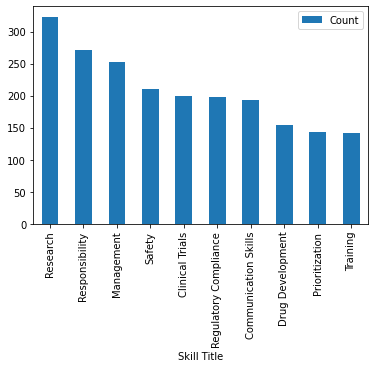

In [142]:
top_skills_job10 = top_skills_job.head(10)
top_skills_job10.plot.bar()
plt.show()

In [138]:
# Top skills by resumes
df_resume = df5[df5['Type']== 'resume']

top_skills_resume = pd.DataFrame(df_resume.skill_title.value_counts().sort_values(ascending= False))

top_skills_resume.index.name ='Skill Title'

top_skills_resume.rename(columns={'skill_title':'Count'}, inplace=True)

top_skills_resume.head()

,Count
Skill Title,
Research,192
Management,147
Clinical Trials,134
Responsibility,126
parasitology,114


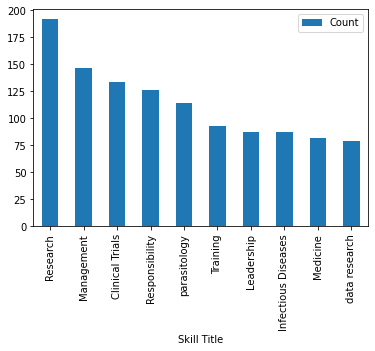

In [144]:
top_skills_resume10 = top_skills_resume.head(10)
top_skills_resume10.plot.bar()
plt.show()

In [145]:
df5[['skill_title', 'Type']].head()

,skill_title,Type
0,billing,job
1,critical care nursing,job
2,Critical Thinking,job
3,Documentation,job
4,drug administration,job


In [149]:
data= df5[['skill_title', 'Type']]

data.groupby('skill_title').count()

KeyError: ignored

In [109]:
# Group by document type
docs_by_types = df5[['ObjectId','Type']].groupby('Type').count()
docs_by_types

,ObjectId
Type,
job,12950
resume,10009


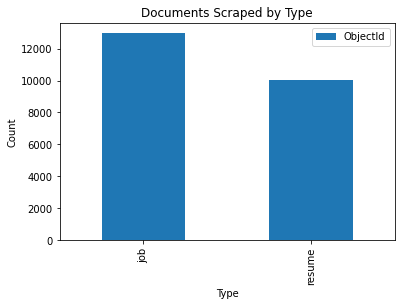

In [115]:
docs_by_types.plot(kind = 'bar')
plt.title('Documents Scraped by Type')
plt.ylabel('Count')
plt.show()

In [150]:
df_job = df5[df5['Type']== 'job']
df_job.head()

,ObjectId,skill_title,DocumentId,Type,OriginalTitle,CreationDate,OriginalCompanyName,RangeFrom,RangeTo,ClusteredTitle,OriginalLocation,OriginalSalary,CountryCode,City,SalaryParsed,State,Complexity,importance,Location,Time,year,month
0,5b9acd0f8150937237061eea,billing,241762023,job,RN- PICC Nurse- PSHGC,2020-04-03 02:38:24,Pioneer Specialty Hospital,NaN,NaN,registered nurse,"Garden City, MI 48135",None,US,Garden City,b'\x00',MI,3.0,0.778135,"GARDEN CITY, MI 48135",04/03/2020,2020,April
1,5b81427ac0db8a324099538c,critical care nursing,241762023,job,RN- PICC Nurse- PSHGC,2020-04-03 02:38:24,Pioneer Specialty Hospital,NaN,NaN,registered nurse,"Garden City, MI 48135",None,US,Garden City,b'\x00',MI,5.0,0.940654,"GARDEN CITY, MI 48135",04/03/2020,2020,April
2,5afc927c2267de1731c7b38f,Critical Thinking,241762023,job,RN- PICC Nurse- PSHGC,2020-04-03 02:38:24,Pioneer Specialty Hospital,NaN,NaN,registered nurse,"Garden City, MI 48135",None,US,Garden City,b'\x00',MI,1.0,0.835810,"GARDEN CITY, MI 48135",04/03/2020,2020,April
3,5baec51e25d3ac67648c2f71,Documentation,241762023,job,RN- PICC Nurse- PSHGC,2020-04-03 02:38:24,Pioneer Specialty Hospital,NaN,NaN,registered nurse,"Garden City, MI 48135",None,US,Garden City,b'\x00',MI,1.0,0.654163,"GARDEN CITY, MI 48135",04/03/2020,2020,April
4,5a9cfaf1fc0da84a0c1dc19c,drug administration,241762023,job,RN- PICC Nurse- PSHGC,2020-04-03 02:38:24,Pioneer Specialty Hospital,NaN,NaN,registered nurse,"Garden City, MI 48135",None,US,Garden City,b'\x00',MI,7.0,1.014463,"GARDEN CITY, MI 48135",04/03/2020,2020,April


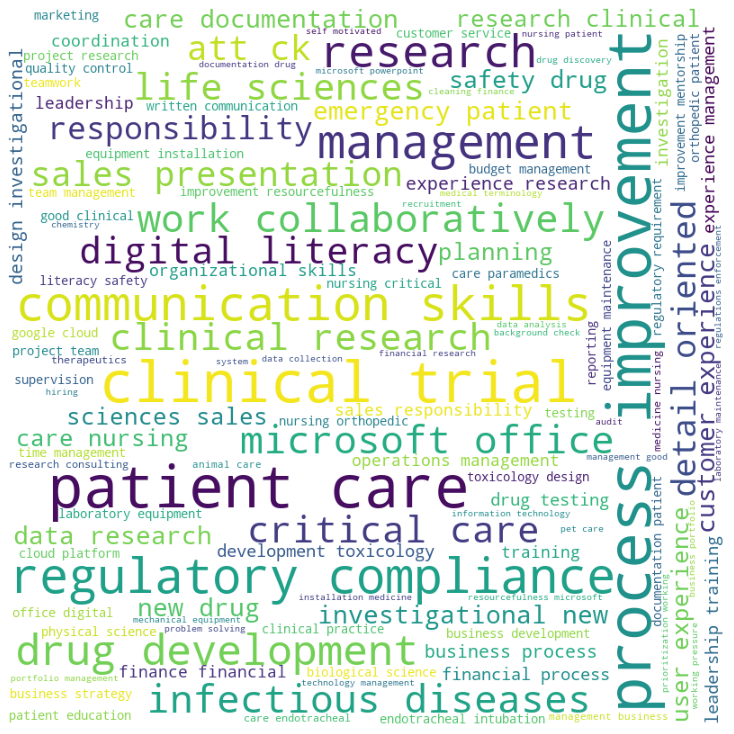

In [151]:
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
  
  
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df_job.skill_title: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

In [ ]:
df5['CreationDate',]